In [7]:
import re
import matplotlib.pyplot as plt
import json
import matplotlib.font_manager as fm

with open('./company_data/company_collected_data_2023-11-07_161657_completed.json') as f:
     data = json.loads(f.read())

# 사원수를 추출하는 함수
def extract_employee_num(info):
    for i in info:
        if "사원수" in i:
            return int(re.findall("\d+", i)[0])  # 숫자만 추출
    return None

# 새로운 딕셔너리 생성
new_data = {item['company_name']: extract_employee_num(item.get('company_info', [])) for item in data}

print(new_data)

{'프리그로우': 12, '비욘드메디슨': 4, '언리저브': 2, '에스피에이디': 2, '언컷젬스컴퍼니': 5, '와드': 170, '메이즈': 8, '제이에스소프트': 8, '더랩스코리아': 14, '바이올렛페이': 2, '언더라이터': 4, '동보항공': 25, '한국평가정보': 38, '앤티에스': 9, '일렉트로비트오토모티브코리아': 18, '저스트엑스': 10, '유케이미디어': 7, '컨두잇': 7, '오픈랩소디': 8, '더싸이언티스트': 10, '온누리아이코리아': 41, '피노키오랩': 5, '디플래닉스': 19, '옵티시스': 97, '바이너리코리아': 24, '어터': 2, '사카드코리아': 5, '레벨스인크': 77, '아브코랩': 4, '링키스': 3, '미스터 디벨로': 5, '소프트스피어': 25, '데브릭스': 17, '이롬넷': 32, '바이스벌사': 11, '오엔제이': 5, '아이씨': 3, '뱅크엑스': 3, '보다에이아이': 7, '아파트아이': 41, '엠엑스티바이오텍': 10, '코넥시오에이치': 20, '에이치디현대글로벌서비스': 530, '크로커스': 43, '라피치': 126, '에디트콜렉티브': 10, '알지에이아이엔씨(RGA Inc.)': 10, '로그싱크': 13, '한국딥러닝': 17, '씨앤에이아이': 40, '디카르고': 32, '인그래디언트': 4, '개념원리': 50, '파트리지시스템즈': 10, '비로보틱스': 40, '지엠디소프트': 82, '뽀득': 265, '티쓰리큐': 101, '우리엔': 53, '프라이어엑스': 17, '피앤더블유에이티': 29, '이노바이드': 15, '에이에프아이': 20, '마인이스(차란)': 15, '키위바인': 48, '롯데헬스케어': 87, '누아': 32, '오토엘': 24}


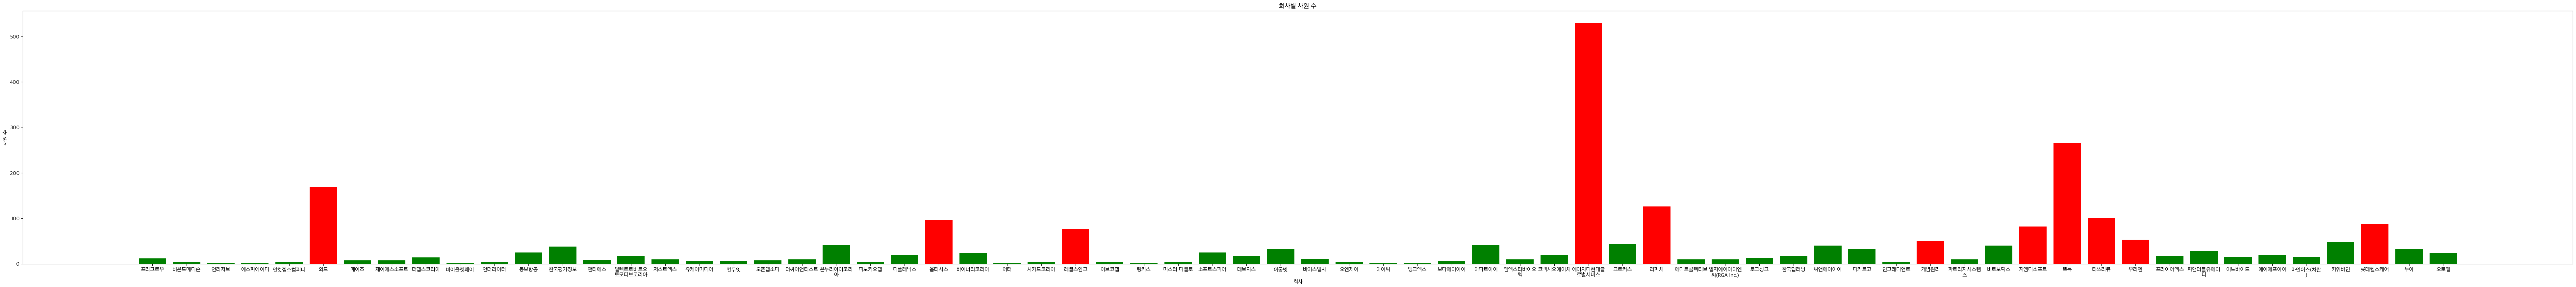

In [9]:
companies = list(new_data.keys())
employees = list(new_data.values())


font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"  # 여기에는 원하는 폰트의 전체 경로를 입력하세요.
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)

companies = [name if len(name) <= 7 else name[:7] + '\n' + name[7:] for name in companies]

plt.figure(figsize=(100, 10))

# 사원수가 50명 이상이면 빨간색 막대
colors = ['red' if x >=50 else 'green' for x in employees]

# 막대그래프
plt.bar(companies, employees, color=colors)


plt.xlabel('회사')
plt.ylabel('사원 수')
plt.title('회사별 사원 수')


plt.show()
